# Pricnciple Component Analysis
### The note book implements the PCA on synthetic dataset
#### 8 August 2021
#### Ibrahim Radwan

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create a synthetic dataset
means = [2.13, -99, 0.11, -1.01] # 4 columns with different means
# Covariance matrix - generalization of the concept of variance to the multivariate case 
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]]) 
print('Covariance matrix')
print(cov_matrix)

n = 100 # number of rows
dataset = np.random.multivariate_normal(means, cov_matrix, n)
print("\nDataset:\n", dataset)
print("\nDataset shape:\n", dataset.shape)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]

Dataset:
 [[ 3.11492754e+00 -9.80853536e+01 -5.20408932e-01 -2.19444569e+00]
 [ 2.35955581e+00 -9.85731395e+01  7.40511712e-01 -6.05763805e-01]
 [-2.81156806e-01 -1.01542458e+02 -5.64852433e-01 -1.77636958e+00]
 [ 1.04312064e+00 -1.00115405e+02 -7.53231433e-02 -7.99385260e-01]
 [ 2.93380623e-01 -1.00518883e+02  1.29315956e+00  2.38170735e-01]
 [ 1.90317880e-01 -1.00544683e+02 -4.12601575e-01 -1.93578953e+00]
 [ 2.47159618e+00 -9.86461633e+01 -2.59846690e-01 -1.13697519e+00]
 [ 1.87732046e+00 -9.89620008e+01  4.00601588e-01 -4.98552761e-01]
 [ 2.57848275e+00 -9.88604823e+01  5.57098570e-01 -4.17404785e-01]
 [ 1.30097212e+00 -9.98071029e+01  5.38048854e-01 -1.03884407e+00]
 [ 3.01107822e+00 -9.85651546e+01  5.26929415e-02 -1.38044830e+00]
 [ 3.72873176e+00 -9.71864907e+01 -6.77757676e-01 -2.20978520e+00]
 [ 3.09410104e+00 -9.80348863e+01 -1.91691387e+00 -3.00632373e+00]
 [ 3.12

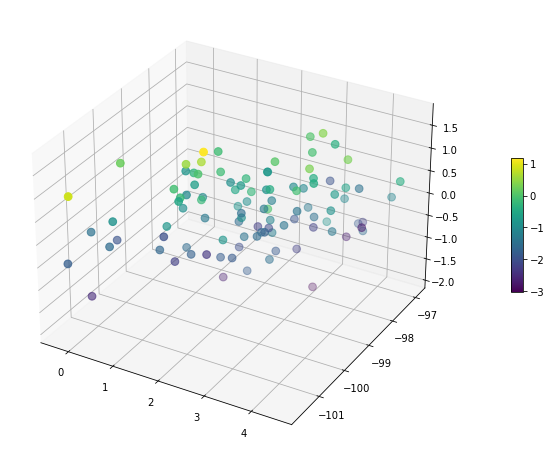

In [4]:
# Let us plot the data
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=dataset[:,0], ys=dataset[:,1], zs=dataset[:,2], c=dataset[:,3], s=60)

cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02,
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)

plt.show()

### 1. Data standardization

In [5]:
print('Before standardization')
print('Mean:\n',dataset.mean(axis=0))
print('Standard deviation:\n',dataset.std(axis=0))

# Standardization
dataset_standardizated = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

print('\nAfter standardization')
print('Mean:\n',dataset_standardizated.mean(axis=0))
print('Standard deviation:\n',dataset_standardizated.std(axis=0))

Before standardization
Mean:
 [ 2.22397521e+00 -9.89426154e+01  5.97890437e-02 -1.05347484e+00]
Standard deviation:
 [1.02908841 1.01322889 0.74085663 0.86092342]

After standardization
Mean:
 [-2.26485497e-16 -2.80886425e-15 -5.10702591e-17  1.32116540e-16]
Standard deviation:
 [1. 1. 1. 1.]


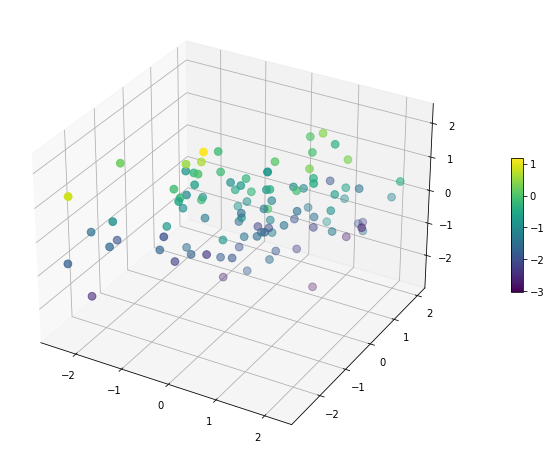

In [6]:
# Let us plot the standardised data
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=dataset_standardizated[:,0], ys=dataset_standardizated[:,1], zs=dataset_standardizated[:,2], c=dataset[:,3], s=60)

cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02,
                    ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)

plt.show()

### 2. Creating a covariance matrix.

In [7]:
covariance_matrix = np.cov(dataset_standardizated.T)
covariance_matrix

array([[ 1.01010101,  0.96938406, -0.04186893, -0.07621218],
       [ 0.96938406,  1.01010101, -0.061407  , -0.09830905],
       [-0.04186893, -0.061407  ,  1.01010101,  0.88452999],
       [-0.07621218, -0.09830905,  0.88452999,  1.01010101]])

### 3. Eigen Decomposition.

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('eigenvalues:\n',eigenvalues,'\n\neigenvectors:\n',eigenvectors)

eigenvalues:
 [2.08278624 1.792253   0.0404617  0.1249031 ] 

eigenvectors:
 [[-0.56429927 -0.42689361  0.7062024   0.02462421]
 [-0.57287983 -0.41338977 -0.70775027  0.00267264]
 [ 0.40986314 -0.57761764  0.00295606 -0.70594712]
 [ 0.43056618 -0.5596683  -0.01894701  0.70783132]]


### 4. Explained total variance.

[0.515, 0.444, 0.031, 0.01]


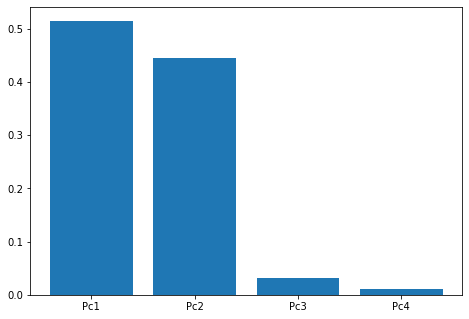

In [9]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis_labels = ['Pc1', 'Pc2', 'Pc3', 'Pc4']
ax.bar(x_axis_labels,explained_variance)
plt.show()

### 5. Feature transformation.

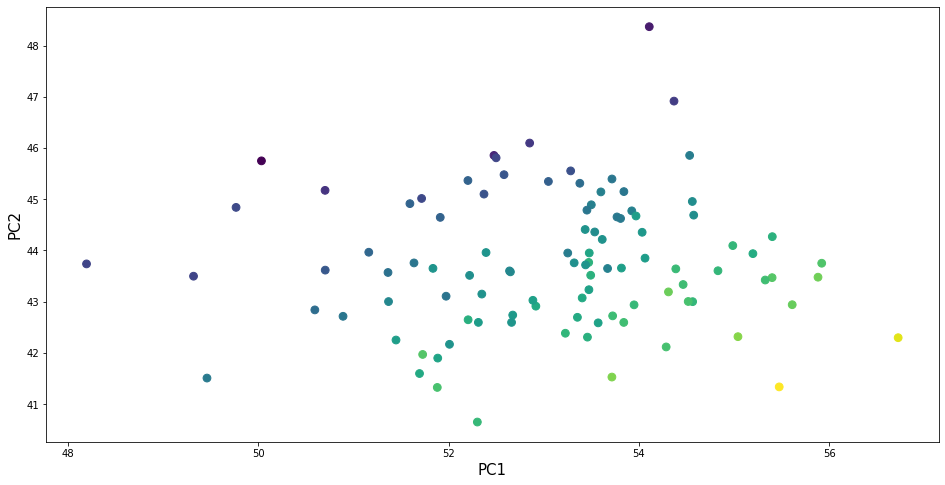

In [14]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)

w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = dataset.dot(w.T[0])
pc2 = dataset.dot(w.T[1])

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c=dataset[:,3], s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, loc='center', size=15)
ax.set_ylabel(ylabel='PC2', rotation=90, loc='center', size=15)
plt.show()